<a href="https://colab.research.google.com/github/yuyangweng/NLP/blob/main/NLP_RNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN (Recurrent Neural Networks) 是什麼?

循環神經網絡（RNN）是非常流行的模型，在NLP的很多任務中已經展示出了很大的威力。

RNN背後的思想是利用信息序列間彼此的相關性。在傳統的神經網絡中，我們假設所有的輸入（包括輸出）之間是相互獨立的。對於很多任務來說，這樣的假設並不適當。 

如果我們想預測一個序列中的下一個詞，我們最好能知道哪些詞在它前面。RNN之所以是循環的，是因為它針對序列中的每一個元素都執行相同的操作，每一個操作都依賴於之前的計算結果(state)，換一種方式思考，可以認為RNN記憶了到當前為止已經計算過的信息。

下面是RNN的一個典型結構圖：


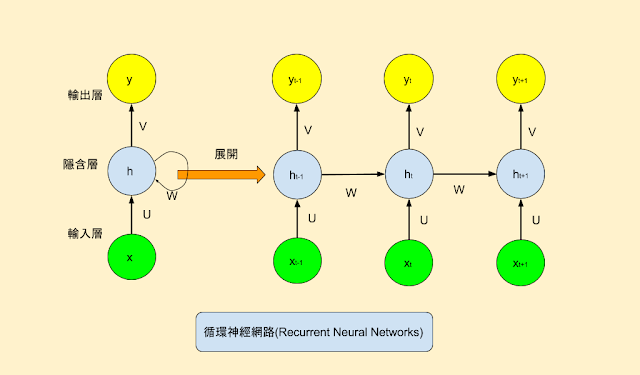

為了使這些循環和狀態的概念更清楚，我們用Numpy來實現一個簡單的RNN。RNN需要接受一個"向量的序列(sequence of vectors)"作為輸人(input), 這個"向量的序列"用一個2維的張量(timesteps, input_features)來表示。

我們的RNN要迭代每一個"時間步(timestep)", 之後我們用"t"來表示"時間步(timestep)"。那某特定"時間步(t)"的輸入為"X"(input_feature

## 一個簡單RNN的pseudo-code:

```
state_t = 0 # 這是某一個"時間步(timestep)"的內部狀態(state)
for input_t in input_sequence:
    state_t = tanh(U o input_t, W o state_t-1)
    output_t = softmax(V o state_t) # 處理過的輸出(output)變成新的狀態(state)
```

## 用Numpy實現的一個簡單RNN
```
timesteps # 輸入序列中的時間步數
inputs_features # 輸入特徵空間的維度
output_features # 輸出特徵空間的維度

# 這是我們的輸入數據
inputs = np.random.random((timesteps, input_features))

# 這是我們的“初始狀態”：一個全零向量
state_t = np.zeros((state_features,))

# 創建隨機權重矩陣
U = np.random.random((state_features, input_features))
W = np.random.random((state_features, state_features))
V = np.random.random((output_features, state_features))
b = np.random.random((state_features,))

successive_outputs = []
for input_t in inputs: 
    # 我們將輸入與當前狀態（即前一個輸出）組合以獲得當前輸出。
    state_t = np.tanh(np.dot(U, input_t) + np.dot(W, state_t-1) + b)
    
    # 我們將此輸出存儲在一個列表中。
    successive_outputs.append(softmax(np.dot(V, state_t)))
    
# 最終輸出是2D張量(timesteps, output_features)
final_output_sequence = np.concatenate(successive_outputs, axis=0)
```

![](https://3.bp.blogspot.com/-9cz6YIf-3Wk/WQ8C-7QNnOI/AAAAAAAAI8g/iFhXR9t3ii0UE9ZRXs425wR_HYJk9i7WgCLcB/s640/RNN1.png)

# Explaining RNNs without neural networks

https://explained.ai/rnn/index.html

#**梯度消減與梯度爆炸**

https://zhuanlan.zhihu.com/p/44163528

## Keras中的第一個循環神經層

在Keras中的`SimpleRNN`神經層可視為上述Numpy簡單循環神經函式的實現。

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import utils

In [3]:
from tensorflow.keras.layers import SimpleRNN

跟上述Numpy的RNN函式有一些些的不同： `SimpleRNN`像所有其他Keras神經層一樣，它會批次地處理序列(batches of sequences)資料，而不是像我們的Numpy示例中的單個序列。 這意味著它需要的張量結構形狀`(batch_size，timesteps，input_features)`的輸入，而不是`(timesteps, input_features)`。

像Keras中的所有其它的循環神經層(recurrent layers)一樣，`SimpleRNN`可以用兩種不同的模式來運行：
1. 它可以返回每個時間步的連續輸出的全部序列（一個形狀為`(batch_size，timesteps，output_features)`的3D張量）
2. 或者它 可以僅返回每個輸入序列的最後一個輸出（一個形狀為`(batch_size，output_features)`的2D張量）。 

這兩種模式由`return_sequences`構造函數參數控制。 我們來看一個例子:

## 使用SimpleRNN並返回最後一個狀態

`return_sequences`預設為`False`

![many-to-one](https://i.stack.imgur.com/QCnpU.jpg)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
 
model = Sequential()
model.add(SimpleRNN(32, input_shape=(3, 1))) # return_sequences預設為False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
Total params: 1,088
Trainable params: 1,088
Non-trainable params: 0
_________________________________________________________________


## 使用SimpleRNN並返回完整的狀態序列

把`return_sequences`設為`True` or `False`

![many-to-many](https://i.stack.imgur.com/DiPyQ.jpg)

In [5]:
model = Sequential()
model.add(SimpleRNN(32, return_sequences=True, input_shape=(3, 1))) # 把return_sequences設為True
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 3, 32)             1088      
Total params: 1,088
Trainable params: 1,088
Non-trainable params: 0
_________________________________________________________________


## 將多個RNN圖層堆疊在一起

為了增加神經網絡的表示能力，有時把多個RNN一個接一個地堆疊起來很有用

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

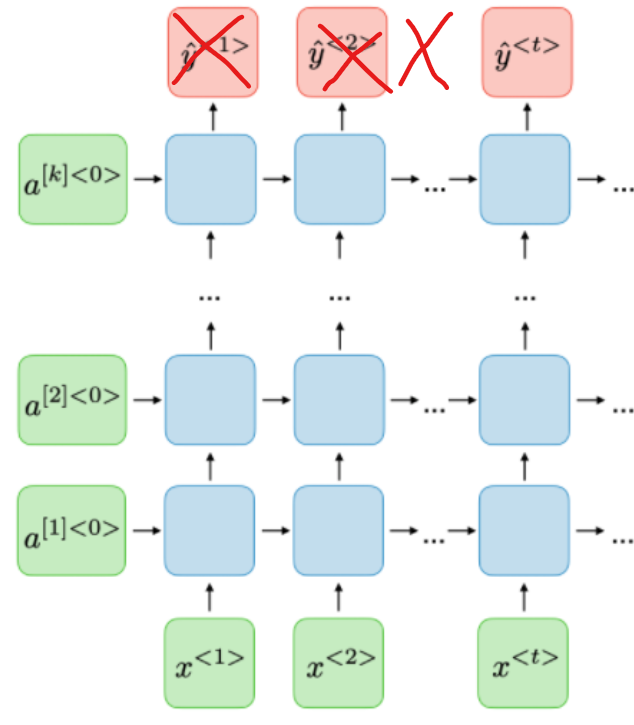


In [6]:
model = Sequential()
model.add(SimpleRNN(32, return_sequences=True, input_shape=(3, 1))) # 把return_sequences設為True
model.add(SimpleRNN(32, return_sequences=True)) # 把return_sequences設為True
model.add(SimpleRNN(32, return_sequences=True)) # 把return_sequences設為True
model.add(SimpleRNN(32))  # 最後的RNN層只需要最後的output"
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 3, 32)             1088      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 3, 32)             2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 3, 32)             2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 7,328
Trainable params: 7,328
Non-trainable params: 0
_________________________________________________________________


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# RNN寫文章

首先，我們預處理數據：

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
INPUT_FILE = "/content/drive/MyDrive/00NLP/alice_in_wonderland.txt"

# extract the input as a stream of characters
print("Extracting text from input...")
fin = open(INPUT_FILE, 'rb')
lines = []
for line in fin:
    line = line.strip().lower()  #刪除頭尾空白或結尾符號
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()
text = " ".join(lines) #連成 1 string

Extracting text from input...


In [13]:
# creating lookup tables
# Here chars is the number of features in our character "vocabulary"
chars = set([c for c in text]) #不重複字母或符號
print(chars)
nb_chars = len(chars)
print(len(chars))

char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

{'(', 's', "'", 'g', ',', '`', 'm', 'w', 'x', ']', '!', 'd', 'b', '?', 'o', 'u', 'c', '.', '_', 'f', 'h', ':', 'q', 'z', '"', 'v', 'a', 'k', ';', '0', '[', '-', 'e', 'j', 'l', '*', 'n', 'i', 'r', ' ', 'p', ')', 'y', 't', '3'}
45


In [14]:
# create inputs and labels from the text. We do this by stepping
# through the text ${step} character at a time, and extracting a 
# sequence of size ${seqlen} and the next output char. For example,
# assuming an input text "The sky was falling", we would get the 
# following sequence of input_chars and label_chars (first 5 only)
#   The sky wa -> s
#   he sky was ->  
#   e sky was  -> f
#    sky was f -> a
#   sky was fa -> l
print("Creating input and label text...")
SEQLEN = 10 # time steps in RNN
gap = 1

input_chars = []
label_chars = []
for i in range(0, len(text) - SEQLEN, gap):
    input_chars.append(text[i:i + SEQLEN]) #每筆輸入10個連續字母或空格
    label_chars.append(text[i + SEQLEN]) #對應輸出1個字母或空格

Creating input and label text...


In [15]:
# One-hot encoding - vectorize the input and label chars
# Each row of the input is represented by seqlen characters, each 
# represented as a 1-hot encoding of size len(char). There are 
# len(input_chars) such rows, so shape(X) is (len(input_chars), seqlen, nb_chars).
# 對應(batch_size，timesteps，input_features)輸入
#
# Each row of output is a single character, also represented as a
# dense encoding of size len(char). Hence shape(y) is (len(input_chars),
# nb_chars).
print("Vectorizing input and label text...")
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)  #(sample size, timesteps, input_features)
dataY = []
for i, input_char in enumerate(input_chars):#全部10個連續字母或空格之list
    for j, ch in enumerate(input_char):#單1組10個連續字母或空格之string
        X[i, j, char2index[ch]] = 1 # one hot
    dataY.append(char2index[label_chars[i]])
y = utils.to_categorical(np.array(dataY))  # one hot

Vectorizing input and label text...


In [16]:
# Build the model. We use a single RNN with a fully connected layer
# to compute the most likely predicted output char
HIDDEN_SIZE = 256
BATCH_SIZE = 128
NUM_ITERATIONS = 25
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100
 
model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,
                    input_shape=(SEQLEN, nb_chars))) # => (timesteps, input_features)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
 
model.compile(loss="categorical_crossentropy", optimizer="adam")

In [17]:
# We train the model in batches and test output generated at each step
for iteration in range(NUM_ITERATIONS): #25
    print("=" * 50)
    print("Iteration #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)
    
    # testing model
    # randomly choose a string from input_chars[list of strings], then use it to 
    # generate text from model for next 100 chars
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating from seed: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH): #100
 
        Xtest = np.zeros((1, SEQLEN, nb_chars))
        for i, ch in enumerate(test_chars):
            Xtest[0, i, char2index[ch]] = 1
        pred = model.predict(Xtest, verbose=0)
        ypred = index2char[np.argmax(pred)]
        print(ypred, end="")
        # move forward with test_chars + ypred
        test_chars = test_chars[1:] + ypred
    print()

Iteration #: 0
1122/1122 [==============================] - 13s 8ms/step - loss: 2.3030
Generating from seed: ident, all
ident, all the sald the sald the sald the sald the sald the sald the sald the sald the sald the sald the sald 
Iteration #: 1
1122/1122 [==============================] - 9s 8ms/step - loss: 2.0070
Generating from seed: not,' alic
not,' alice was in the dond the dore the dore the dore the dore the dore the dore the dore the dore the dore t
Iteration #: 2
1122/1122 [==============================] - 9s 8ms/step - loss: 1.8973
Generating from seed: ll his fan
ll his fand the mare the mouse the the the the the the the the the the the the the the the the the the the the
Iteration #: 3
1122/1122 [==============================] - 10s 9ms/step - loss: 1.8024
Generating from seed:  gardeners
 gardeners the roure she rabbed the rabbet to the roush sere the lorge she cand and and her herse for the the 
Iteration #: 4
1122/1122 [==============================] - 9s 8ms/step - 

## 了解長短期記憶模型（long short-term memory，LSTM）與 GRU

`SimpleRNN`不是Keras唯一可用的RNN層：在Keras中還有`LSTM`和`GRU`。 在實務中，你將永遠使用其中的一個，`SimpleRNN`一般來說太簡單了，以至於沒有任何實際用途。

LSTM（long short-term memory單元(cell)使用了輸入閘(input gate)，忘記閘(forget get)和輸出閘(output gate)來解決原本的RNN單元(cell)會面臨的梯度消失或梯度爆炸的現象。

![lstm_vs_rnn](https://cdn-images-1.medium.com/max/1600/0*kl2Cd89GGQClOS48.)

這些閘每個都有自己的一組權重值。 整個LSTM單元(cell)是可微分的（意思是我們計算梯度並使用它們來更新權重），所以我們可以使用反向(back-propagation)來迭代訓練它。基本上，LSTM單元為我們提供遺忘(forget)，記憶(memory)和關注(attention)的機制。 

![lstm_cell](https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.)

## 一個具體的LSTM範例


In [18]:
from tensorflow.keras.layers import LSTM

In [19]:
# vectorize the input and label chars
# Each row of the input is represented by seqlen characters, each 
# represented as a 1-hot encoding of size len(char). There are 
# len(input_chars) such rows, so shape(X) is (len(input_chars),
# seqlen, nb_chars).
# Each row of output is a single character, also represented as a
# dense encoding of size len(char). Hence shape(y) is (len(input_chars),
# nb_chars).
print("Vectorizing input and label text...")
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
dataY = []
for i, input_char in enumerate(input_chars):#全部10個連續字母或空格之list
    for j, ch in enumerate(input_char):#單1組10個連續字母或空格之string
        X[i, j, char2index[ch]] = 1
    dataY.append(char2index[label_chars[i]])
y = utils.to_categorical(np.array(dataY)) # one hot

Vectorizing input and label text...


In [20]:
# Build the model. We use a single RNN with a fully connected layer
# to compute the most likely predicted output char
HIDDEN_SIZE = 256
BATCH_SIZE = 128
NUM_ITERATIONS = 25
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

model = Sequential()
model.add(LSTM(HIDDEN_SIZE, return_sequences=False,
                    input_shape=(SEQLEN, nb_chars)))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam")

In [21]:
# We train the model in batches and test output generated at each step
for iteration in range(NUM_ITERATIONS):
    print("=" * 50)
    print("Iteration #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)
    
    # testing model
    # randomly choose a row from input_chars, then use it to 
    # generate text from model for next 100 chars
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating from seed: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        Xtest = np.zeros((1, SEQLEN, nb_chars))
        for i, ch in enumerate(test_chars):
            Xtest[0, i, char2index[ch]] = 1
        pred = model.predict(Xtest, verbose=0)
        ypred = index2char[np.argmax(pred)]
        print(ypred, end="")
        # move forward with test_chars + ypred
        test_chars = test_chars[1:] + ypred
    print()

Iteration #: 0
1122/1122 [==============================] - 9s 4ms/step - loss: 2.3383
Generating from seed:  the house
 the house the hand the hand the hand the hand the hand the hand the hand the hand the hand the hand the hand 
Iteration #: 1
1122/1122 [==============================] - 4s 4ms/step - loss: 1.8698
Generating from seed: now you're
now you're the growh the growh the growh the growh the growh the growh the growh the growh the growh the growh
Iteration #: 2
1122/1122 [==============================] - 4s 4ms/step - loss: 1.6753
Generating from seed: !' said th
!' said the could to the could to the could to the could to the could to the could to the could to the could t
Iteration #: 3
1122/1122 [==============================] - 4s 4ms/step - loss: 1.5393
Generating from seed: n't opened
n't opened to her had to herself, `i shall it as she had not in a little soor as she had not in a little soor 
Iteration #: 4
1122/1122 [==============================] - 4s 4ms/step - lo

### 參考: 
* [fchollet: deep-learning-with-python-notebooks (原文)](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb)
* [Keras官網](http://keras.io/)

*https://github.com/PacktPublishing/Deep-Learning-with-Keras

*https://github.com/erhwenkuo

MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [22]:
!nvidia-smi

Thu Jun 17 06:37:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |    660MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------